Diabetes Prediction

In [4]:
# Lets start with importing neccessary libraries
import warnings
warnings.filterwarnings('ignore')

import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [5]:
data=pd.read_csv(r"C:\Program Files\Python311\project\diabetic prediction\diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [8]:
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [9]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [10]:
data.duplicated().sum()

np.int64(0)

In [11]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [12]:
#there few misconception is their like BMI can not be zero,BP cant b zero
# noe replacing zero value with the mean of column 
data['BMI']=data['BMI'].replace(0,data['BMI'].mean())
data['BloodPressure']=data['BloodPressure'].replace(0,data['BloodPressure'].mean())
data['Glucose']=data['Glucose'].replace(0,data['Glucose'].mean())
data['Insulin']=data['Insulin'].replace(0,data['Insulin'].mean())
data['SkinThickness']=data['SkinThickness'].replace(0,data['SkinThickness'].mean())

In [13]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127964,0.208984,0.013376,-0.018082,0.021546,-0.033523,0.544341,0.221898
Glucose,0.127964,1.000000,0.219666,0.160766,0.396597,0.231478,0.137106,0.266600,0.492908
BloodPressure,0.208984,0.219666,1.000000,0.134155,0.010926,0.281231,0.000371,0.326740,0.162986
SkinThickness,0.013376,0.160766,0.134155,1.000000,0.240361,0.535703,0.154961,0.026423,0.175026
Insulin,-0.018082,0.396597,0.010926,0.240361,1.000000,0.189856,0.157806,0.038652,0.179185
BMI,0.021546,0.231478,0.281231,0.535703,0.189856,1.000000,0.153508,0.025748,0.312254
DiabetesPedigreeFunction,-0.033523,0.137106,0.000371,0.154961,0.157806,0.153508,1.000000,0.033561,0.173844
Age,0.544341,0.266600,0.326740,0.026423,0.038652,0.025748,0.033561,1.000000,0.238356
Outcome,0.221898,0.492908,0.162986,0.175026,0.179185,0.312254,0.173844,0.238356,1.000000


In [14]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [57]:
! pip install autoviz


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Imported v0.1.905. Please call AutoViz in this sequence:
    AV = AutoViz_Class()
    %matplotlib inline
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)
Shape of your Data Set loaded: (768, 9)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  6
    Number of Integer-Categorical Columns =  2
    Number of String-Categorical Columns =  0
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  0
    Number of Numeric-Boolean Columns =  1
    Number of Discrete String Columns =  0
    Number of NLP String Columns =  0
    Number of D

,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
Pregnancies,int64,0.000000,2,0.000000,17.000000,Column has 4 outliers greater than upper bound (13.50) or lower than lower bound(-6.50). Cap them or remove them.
Glucose,float64,0.000000,NA,44.000000,199.000000,No issue
BloodPressure,float64,0.000000,NA,24.000000,122.000000,Column has 14 outliers greater than upper bound (104.00) or lower than lower bound(40.00). Cap them or remove them.
SkinThickness,float64,0.000000,NA,7.000000,99.000000,Column has 12 outliers greater than upper bound (49.20) or lower than lower bound(3.34). Cap them or remove them.
Insulin,float64,0.000000,NA,14.000000,846.000000,Column has 89 outliers greater than upper bound (198.43) or lower than lower bound(8.62). Cap them or remove them.
BMI,float64,0.000000,NA,18.200000,67.100000,Column has 8 outliers greater than upper bound (50.25) or lower than lower bound(13.85). Cap them or remove them.
DiabetesPedigreeFunction,float64,0.000000,NA,0.078000,2.420000,Column has 29 outliers greater than upper bound (1.20) or lower than lower bound(-0.33). Cap them or remove them.
Age,int64,0.000000,6,21.000000,81.000000,Column has 9 outliers greater than upper bound (66.50) or lower than lower bound(-1.50). Cap them or remove them.
Outcome,int64,0.000000,0,0.000000,1.000000,No issue


Number of All Scatter Plots = 21


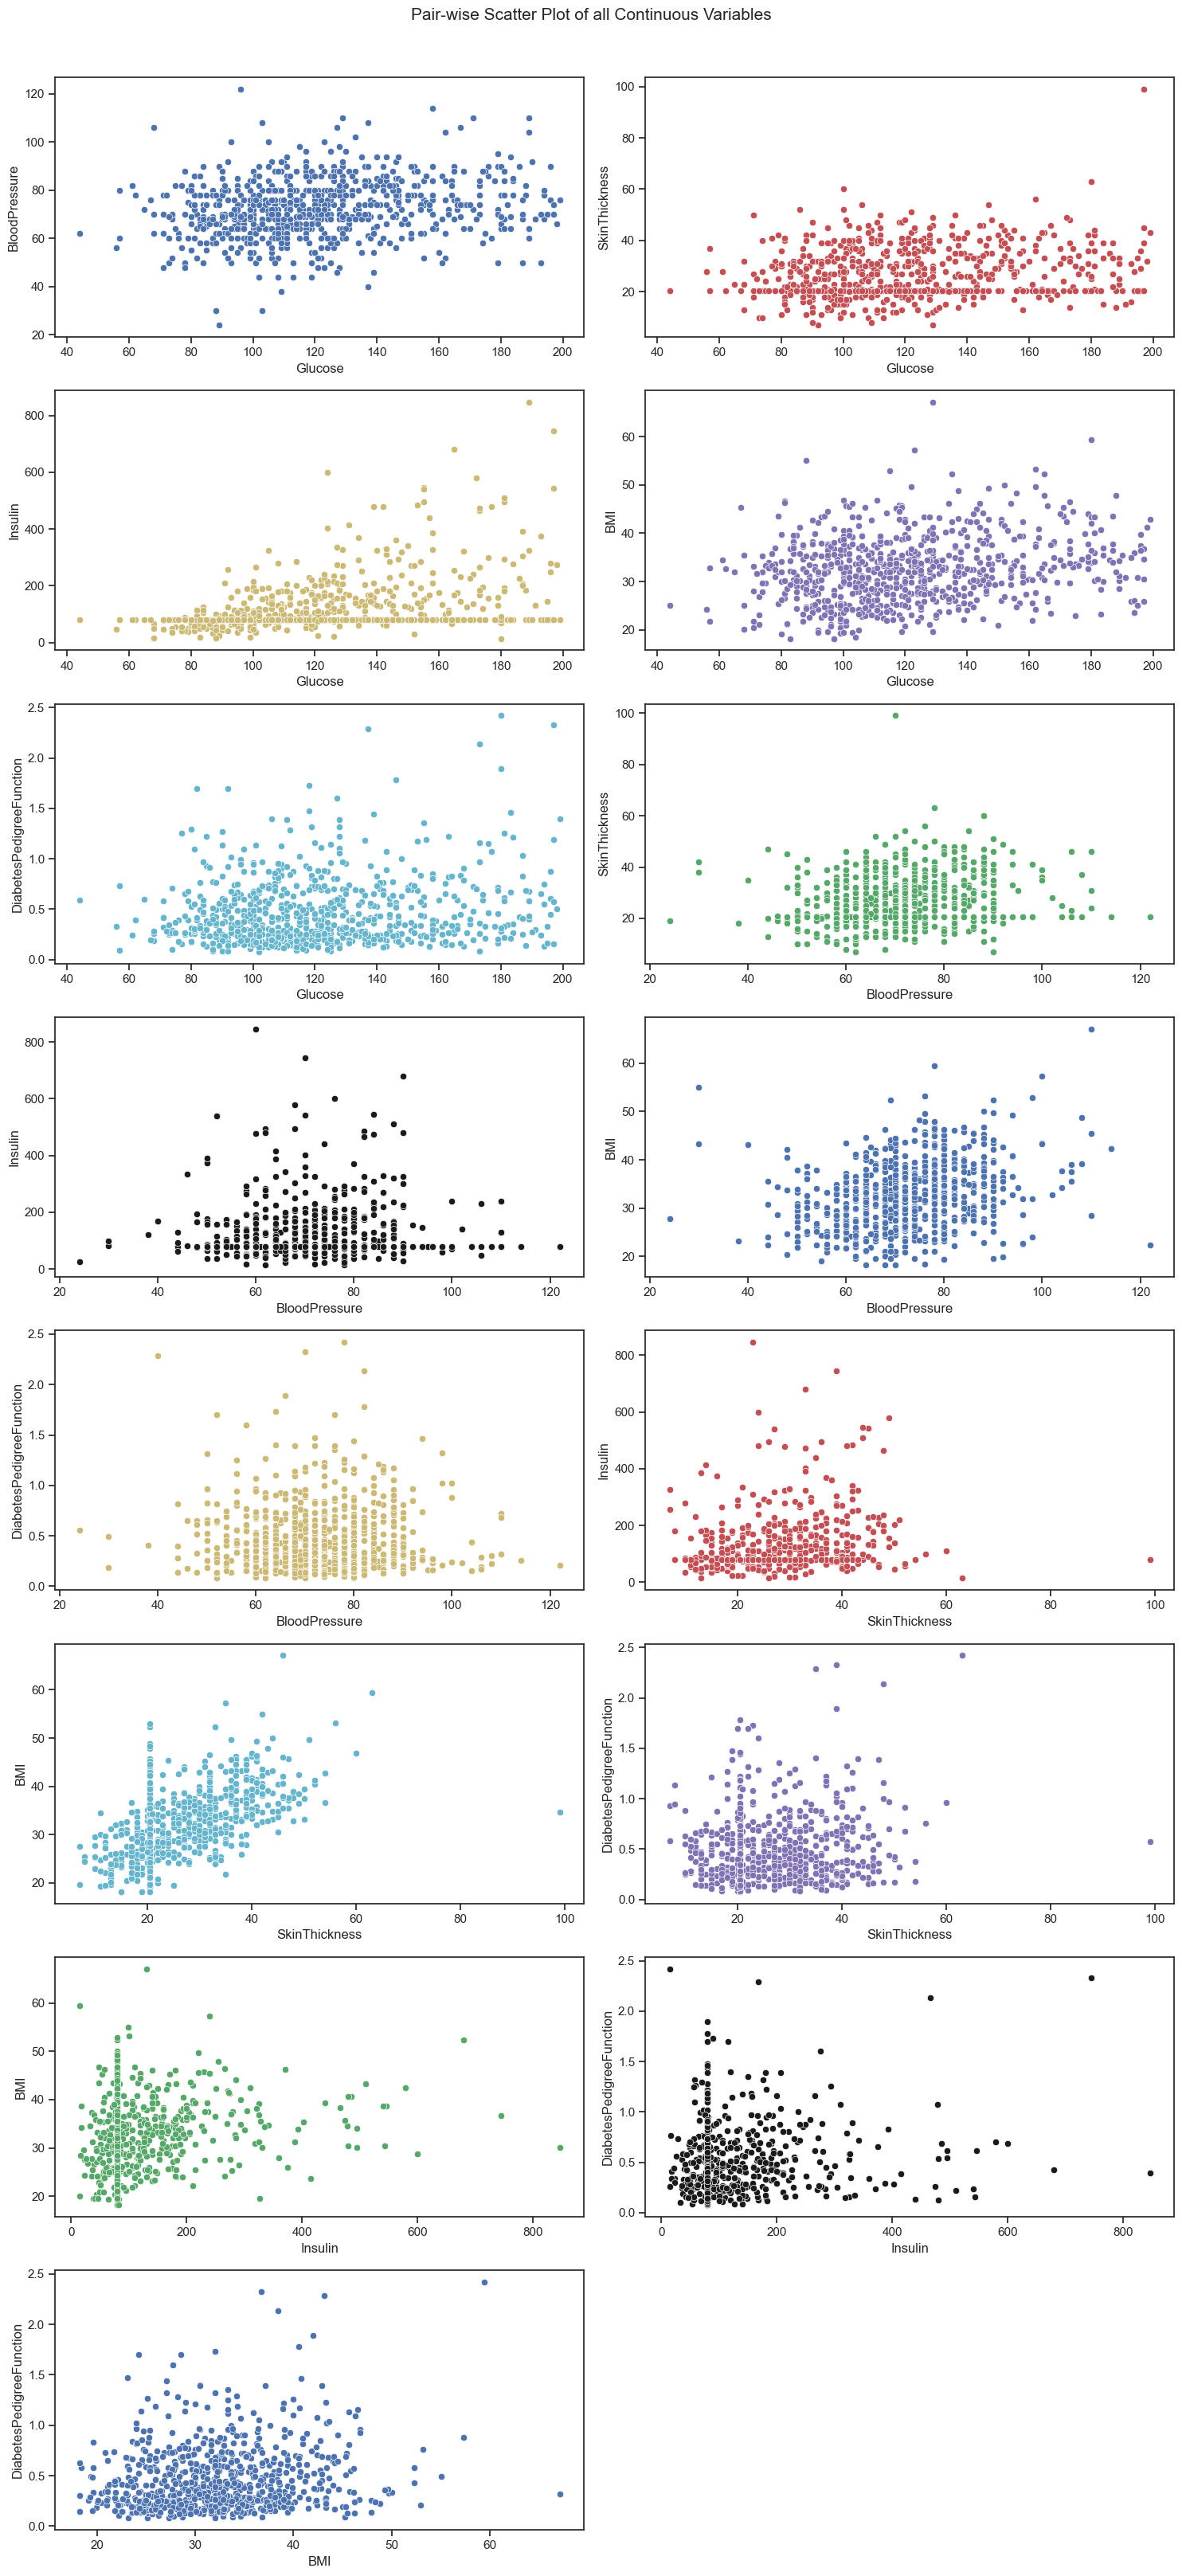

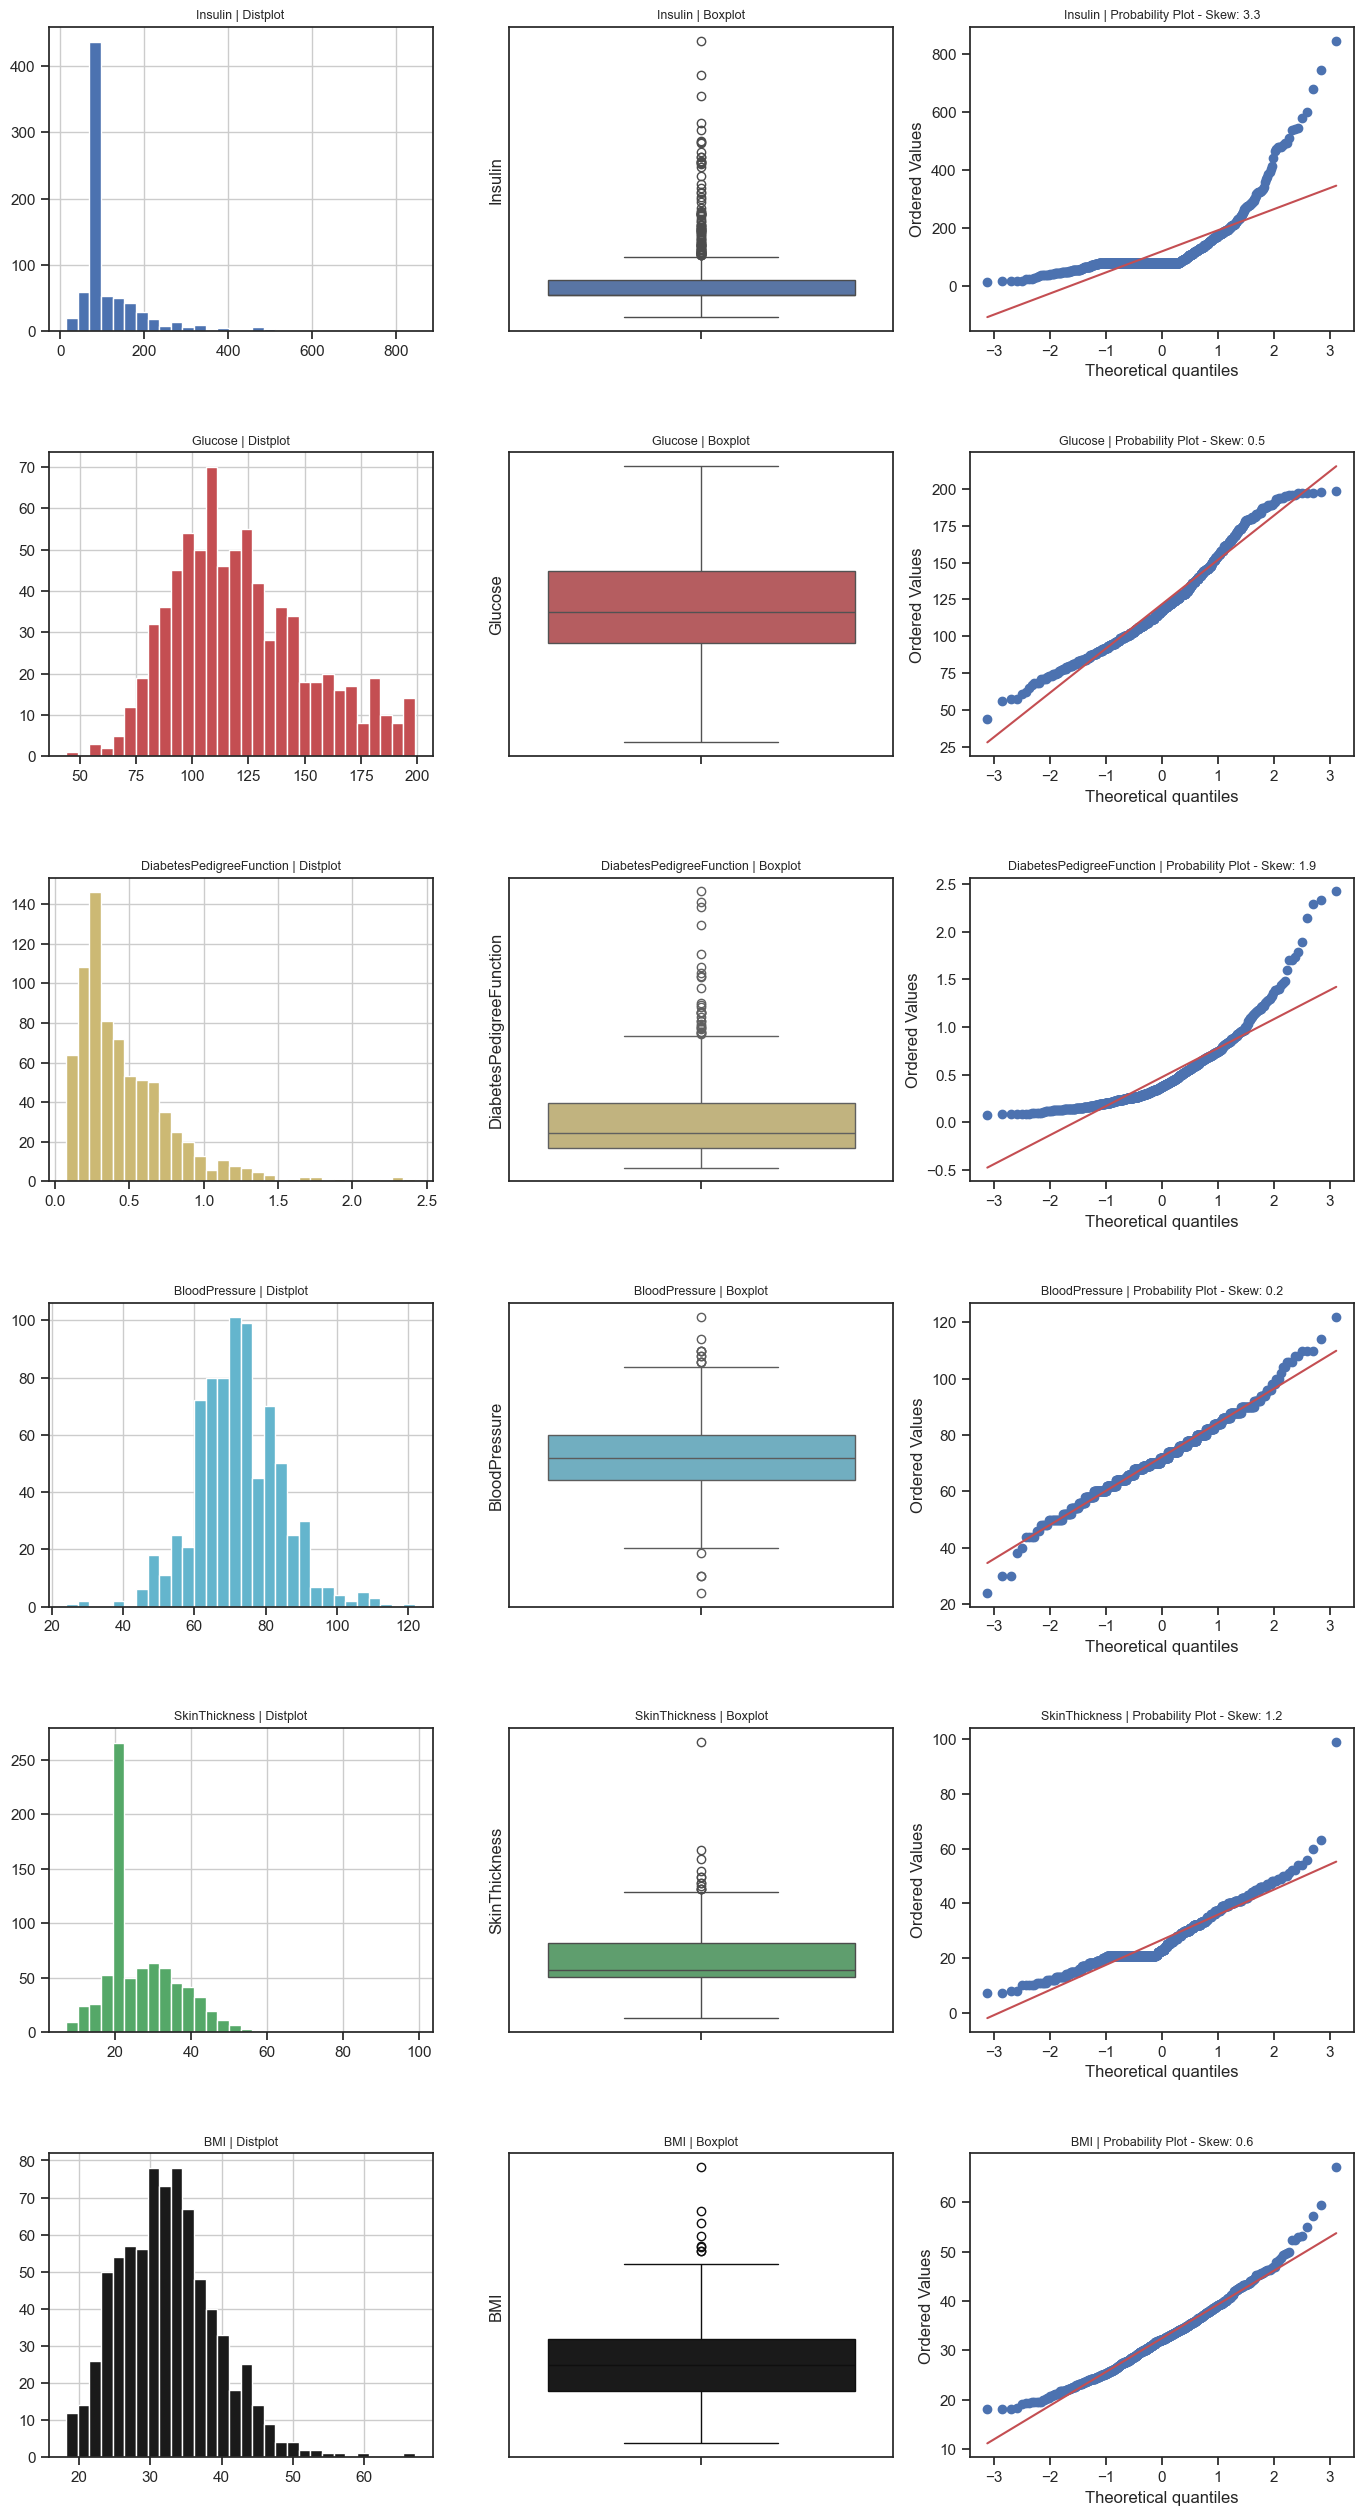

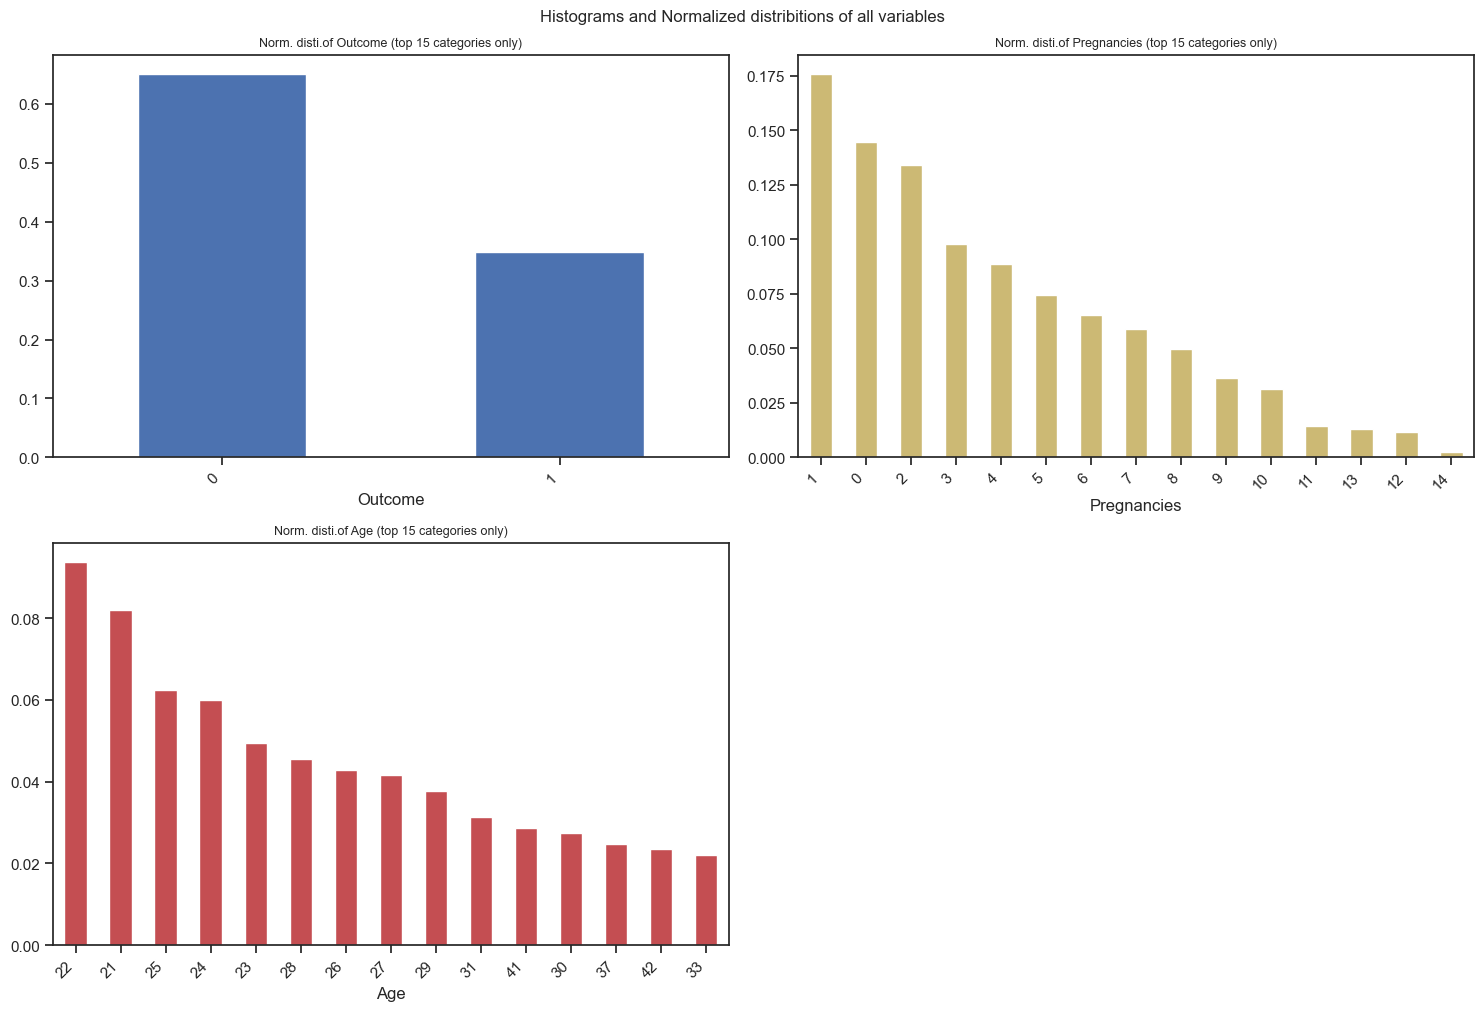

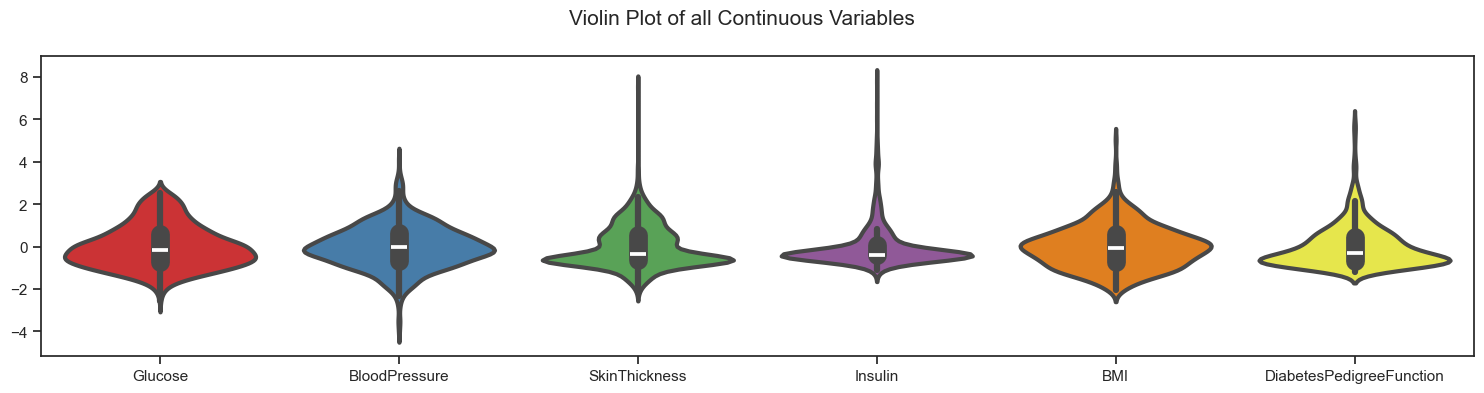

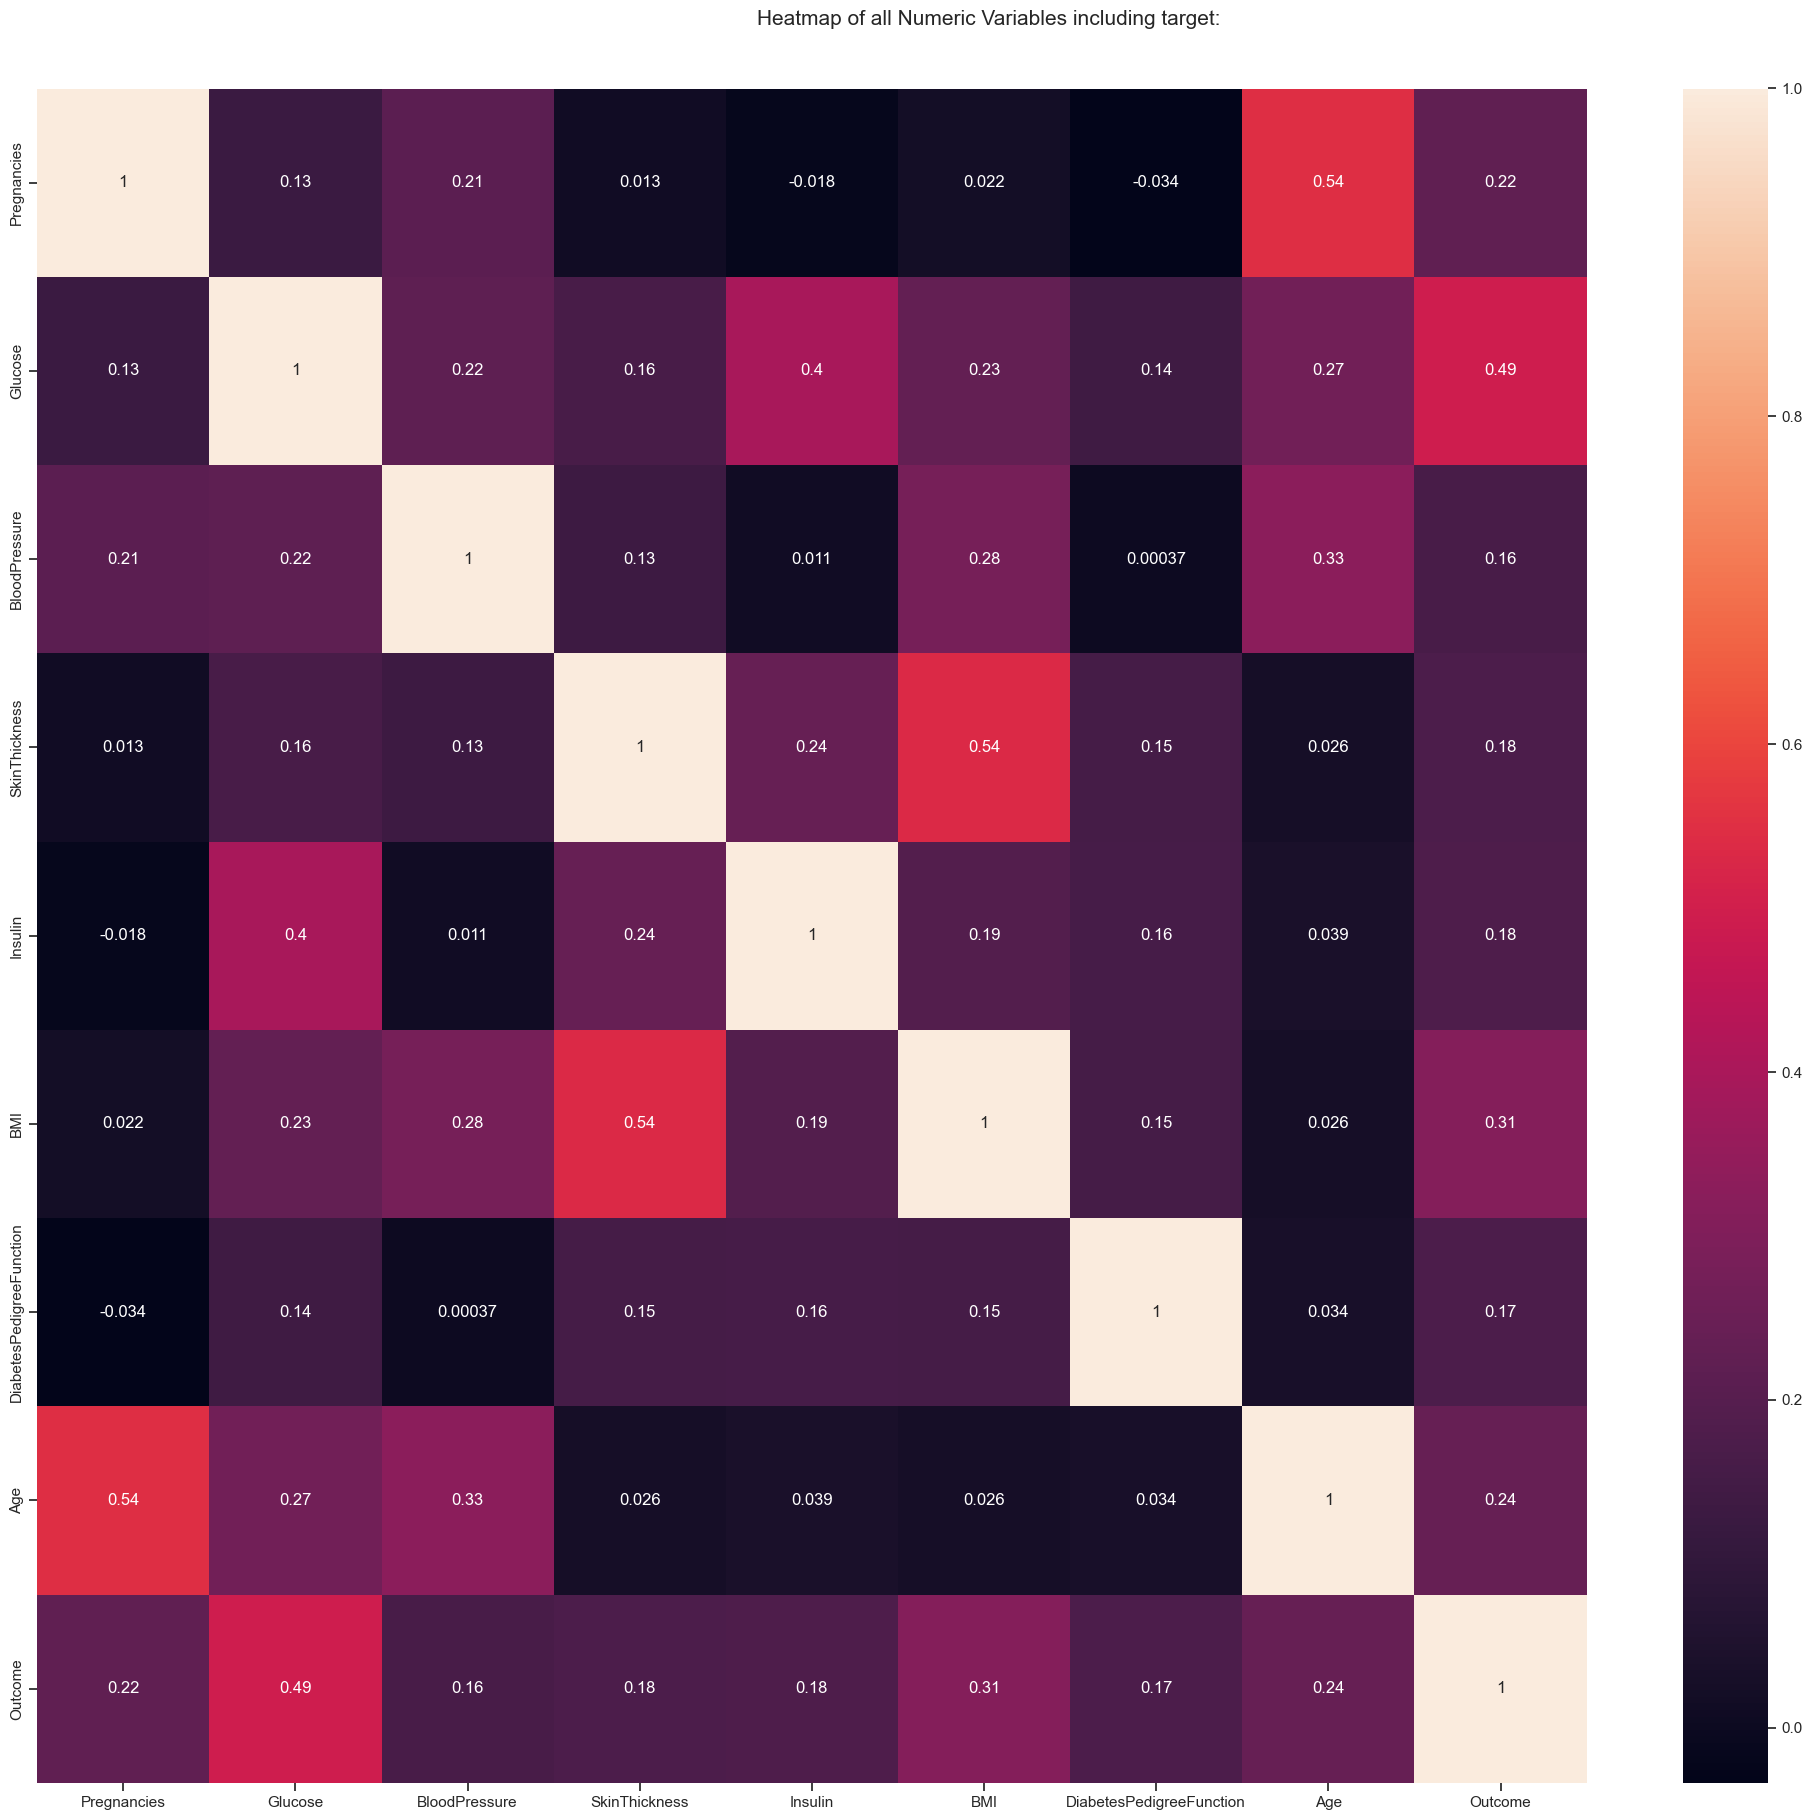

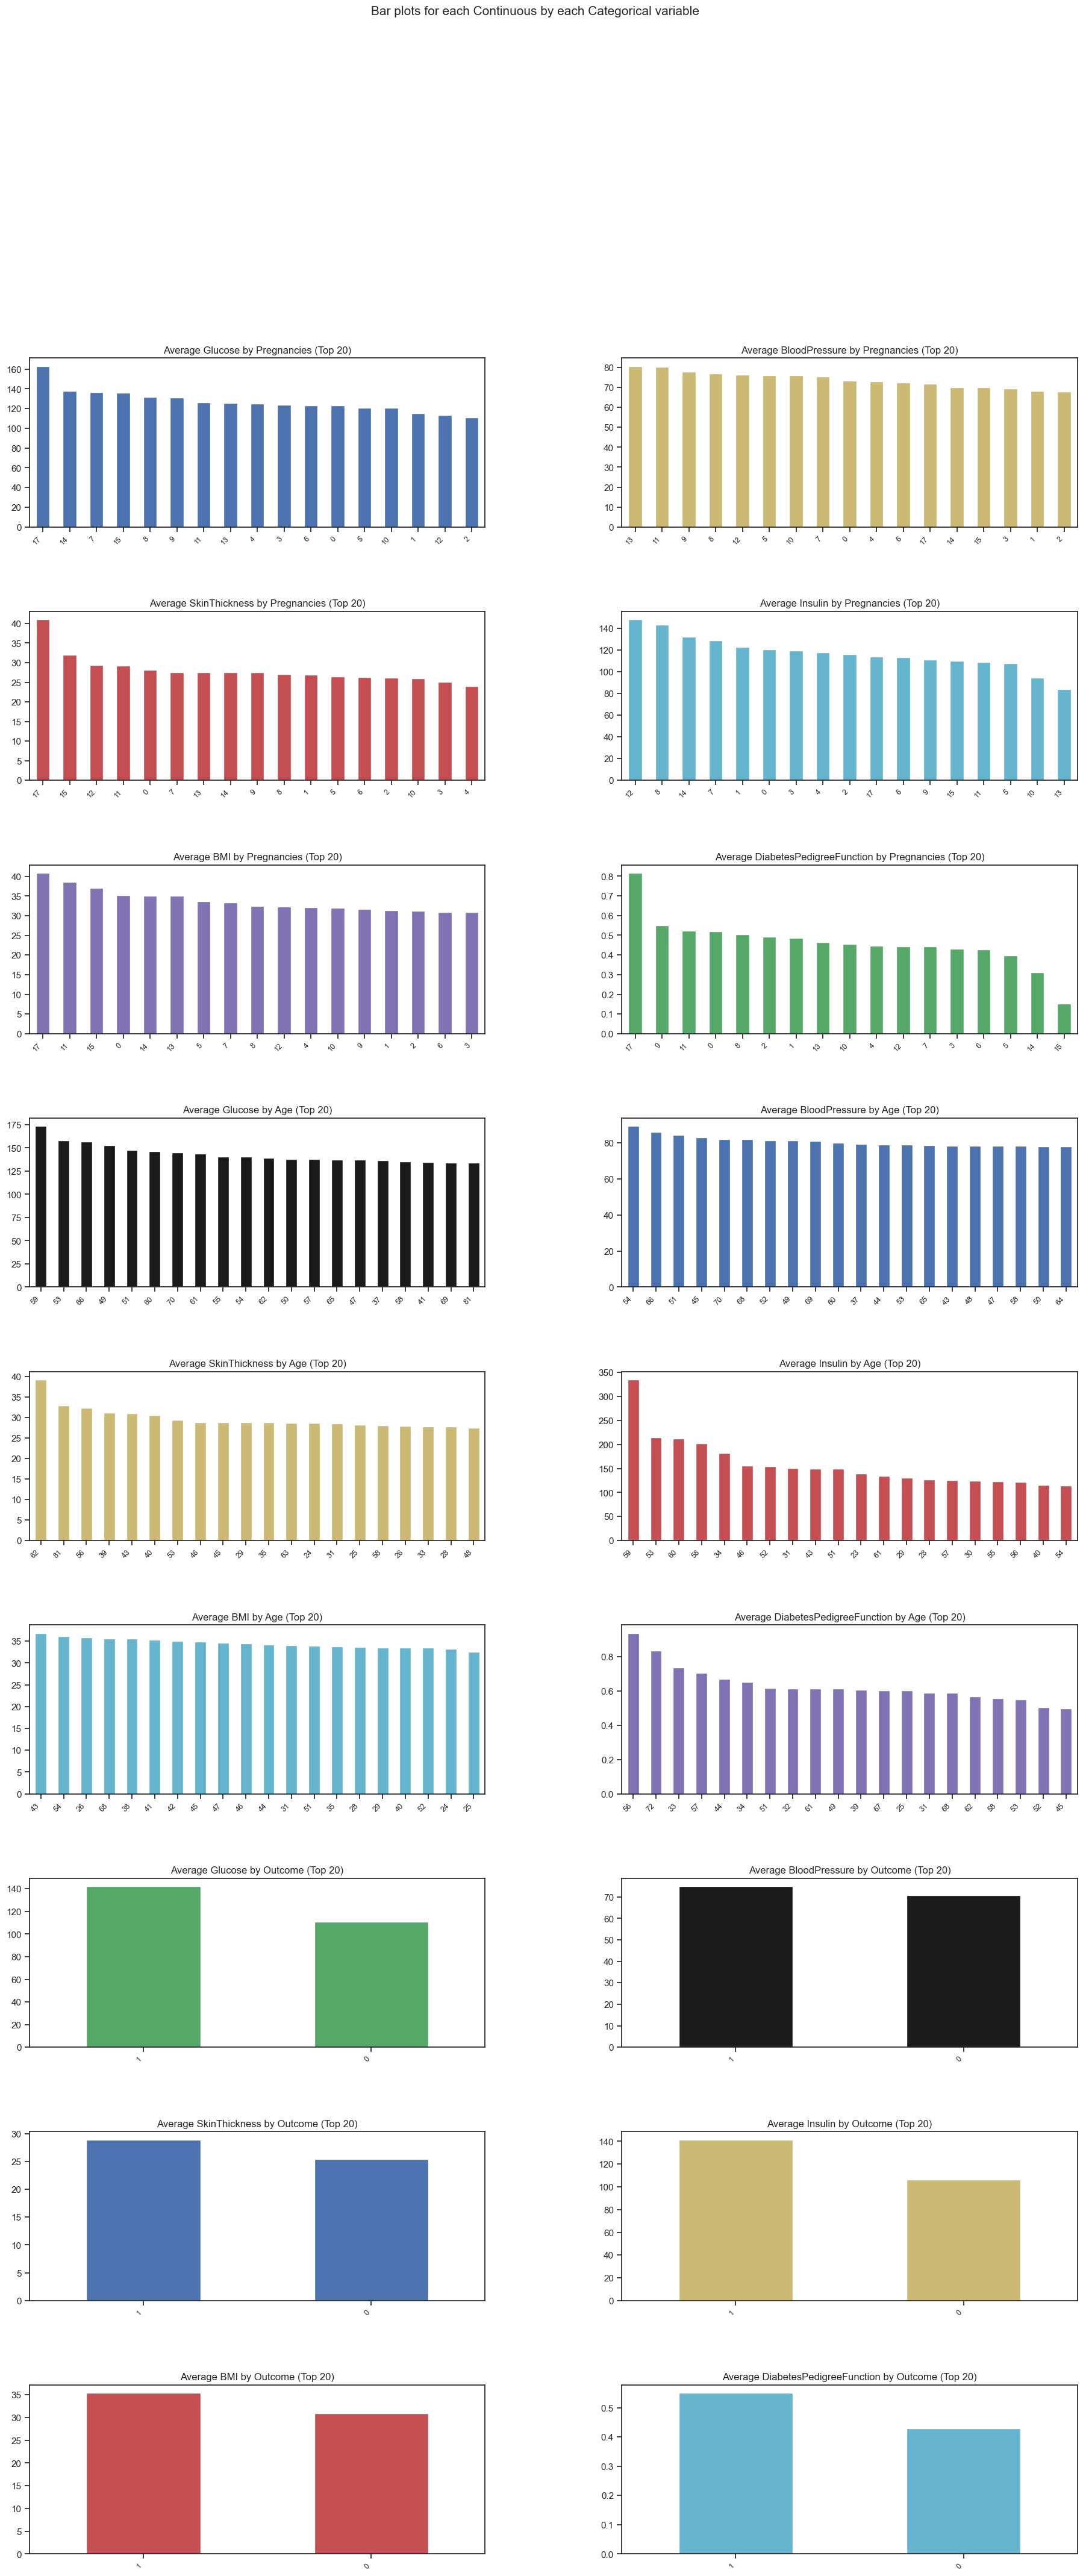

All Plots done
Time to run AutoViz = 11 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [16]:
from autoviz.AutoViz_Class import AutoViz_Class
%matplotlib inline
AV = AutoViz_Class()

filename=data
dft=AV.AutoViz(
    filename
)

Data Visualization

array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

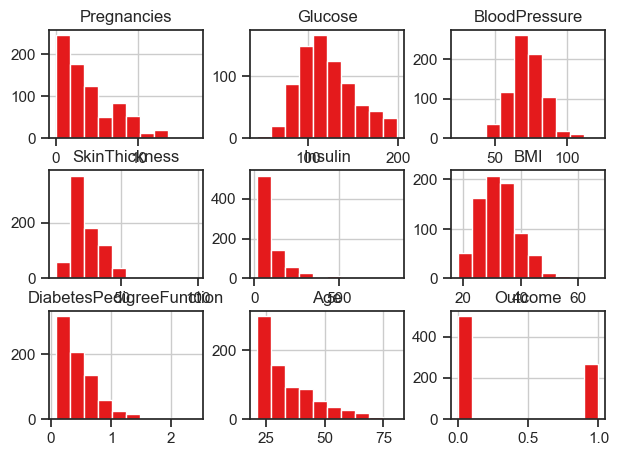

In [17]:
data.hist()

<Axes: xlabel='Outcome', ylabel='count'>

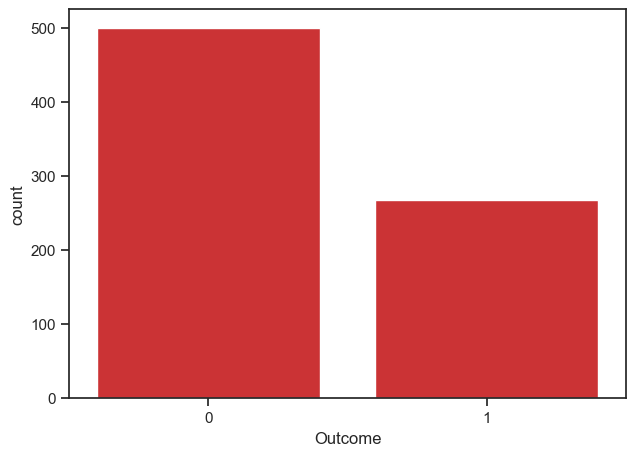

In [18]:
sns.countplot(x='Outcome',data=data)

<Axes: >

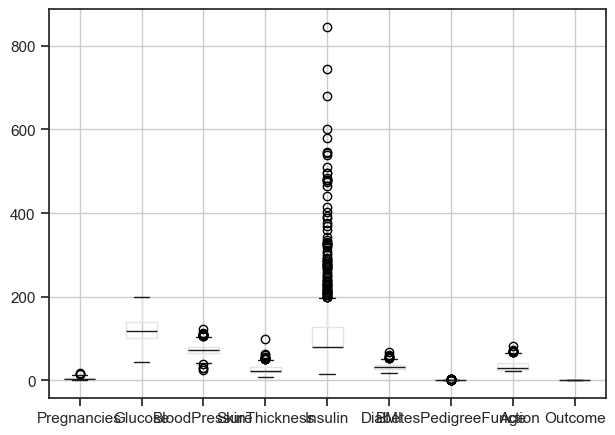

In [19]:
data.boxplot()

In [20]:
# Outlier removal 
num_cols = data.select_dtypes(include=[float, int]).columns
categorical_cols = data.select_dtypes(include=[object, 'category']).columns
# Detect outliers using IQR method
Q1 = data[num_cols].quantile(0.25)
Q3 = data[num_cols].quantile(0.75)
IQR = Q3 - Q1

# Define a function to identify outliers
def detect_outliers_iqr(data):
    outliers = ((data[num_cols] < (Q1 - 1.5 * IQR)) | (data[num_cols] > (Q3 + 1.5 * IQR)))
    return outliers

# Apply the function to the dataframe
outliers = detect_outliers_iqr(data)

# Print outliers summary
print(outliers.sum()/len(data)*100)

Pregnancies                  0.520833
Glucose                      0.000000
BloodPressure                1.822917
SkinThickness                1.562500
Insulin                     11.588542
BMI                          1.041667
DiabetesPedigreeFunction     3.776042
Age                          1.171875
Outcome                      0.000000
dtype: float64


In [21]:
data = data[~outliers.any(axis=1)]

In [22]:
# Outlier removal 
num_cols = data.select_dtypes(include=[float, int]).columns
categorical_cols = data.select_dtypes(include=[object, 'category']).columns
# Detect outliers using IQR method
Q1 = data[num_cols].quantile(0.25)
Q3 = data[num_cols].quantile(0.75)
IQR = Q3 - Q1

# Define a function to identify outliers
def detect_outliers_iqr(data):
    outliers = ((data[num_cols] < (Q1 - 1.5 * IQR)) | (data[num_cols] > (Q3 + 1.5 * IQR)))
    return outliers

# Apply the function to the dataframe
outliers = detect_outliers_iqr(data)

# Print outliers summary
print(outliers.sum()/len(data)*100)

Pregnancies                  0.000000
Glucose                      1.938611
BloodPressure                0.807754
SkinThickness                0.807754
Insulin                     26.817447
BMI                          0.807754
DiabetesPedigreeFunction     2.261712
Age                          0.969305
Outcome                      0.000000
dtype: float64


<Axes: >

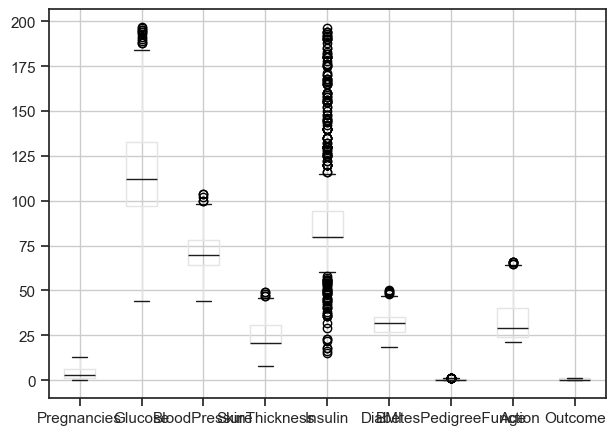

In [23]:
data.boxplot()

Data Encoding

In [24]:
label=LabelEncoder()
for column in data.select_dtypes(include=['object','category','bool']).columns:
    data[column]=label.fit_transform(data[column])
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
5,5,116.0,74.0,20.536458,79.799479,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1


Split the data

In [25]:
x=data.drop(['Outcome'],axis=1)
y=data['Outcome']

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.3)

In [27]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((433, 8), (186, 8), (433,), (186,))

Standardization

In [28]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

In [29]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((433, 8), (186, 8), (433,), (186,))

Model Building

Logistic Regression

In [30]:
# Initialize Logistic Regression classifier
from sklearn.linear_model import LogisticRegression
Logistic= LogisticRegression(max_iter=1000, random_state=42)
# Train the classifier
Logistic.fit(x_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [31]:
print("Training Accuracy :", Logistic.score(x_train, y_train))
print("Testing Accuracy :", Logistic.score(x_test, y_test))

Training Accuracy : 0.76905311778291
Testing Accuracy : 0.8225806451612904


In [32]:
# Predict sentiment on the test set
y_pred = Logistic.predict(x_test)

# Calculate accuracy
log_accuracy = accuracy_score(y_test, y_pred)
print(log_accuracy)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


0.8225806451612904

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88       133
           1       0.72      0.62      0.67        53

    accuracy                           0.82       186
   macro avg       0.79      0.76      0.77       186
weighted avg       0.82      0.82      0.82       186


Confusion Matrix:
[[120  13]
 [ 20  33]]


In [33]:
parameters={'penalty':('l1','l2','elastic',None),'C':[1,10]}
Log_cv=GridSearchCV(Logistic,param_grid=parameters,cv=5)
Log_cv.fit(x_train,y_train) # spliting of the train to validation data

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000, random_state=42),
             param_grid={'C': [1, 10],
                         'penalty': ('l1', 'l2', 'elastic', None)})

In [34]:
Log_cv.best_params_

{'C': 1, 'penalty': 'l2'}

In [35]:
print("Training Accuracy :", Log_cv.score(x_train, y_train))
print("Testing Accuracy :", Log_cv.score(x_test, y_test))

Training Accuracy : 0.76905311778291
Testing Accuracy : 0.8225806451612904


In [36]:
# Predict sentiment on the test set
y_pred = Log_cv.predict(x_test)

# Calculate accuracy
log_accuracy = accuracy_score(y_test, y_pred)
print(log_accuracy)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


0.8225806451612904

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88       133
           1       0.72      0.62      0.67        53

    accuracy                           0.82       186
   macro avg       0.79      0.76      0.77       186
weighted avg       0.82      0.82      0.82       186


Confusion Matrix:
[[120  13]
 [ 20  33]]


SVM

In [37]:
from sklearn.svm import SVC
SVM = SVC(kernel='linear')
SVM.fit(x_train, y_train)

SVC(kernel='linear')

In [38]:
print("Training Accuracy :", SVM.score(x_train, y_train))
print("Testing Accuracy :", SVM.score(x_test, y_test))

Training Accuracy : 0.7713625866050808
Testing Accuracy : 0.8279569892473119


In [39]:
# Predict sentiment on the test set
y_pred = SVM.predict(x_test)

# Calculate accuracy
svm_accuracy= accuracy_score(y_test, y_pred)
print(svm_accuracy)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


0.8279569892473119

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.91      0.88       133
           1       0.73      0.62      0.67        53

    accuracy                           0.83       186
   macro avg       0.80      0.77      0.78       186
weighted avg       0.82      0.83      0.82       186


Confusion Matrix:
[[121  12]
 [ 20  33]]


In [40]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 
    'gamma': ['scale', 'auto']
}
SVM_cv = GridSearchCV(SVM, param_grid=param_grid, cv=5, scoring='accuracy')
SVM_cv.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=SVC(kernel='linear'),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='accuracy')

In [41]:
SVM_cv.best_params_

{'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}

In [42]:
print("Training Accuracy :", SVM_cv.score(x_train, y_train))
print("Testing Accuracy :", SVM_cv.score(x_test, y_test))

Training Accuracy : 0.7736720554272517
Testing Accuracy : 0.8225806451612904


Random Forest Classifier

In [43]:
from sklearn.ensemble import RandomForestClassifier
Rf= RandomForestClassifier(n_estimators=100, random_state=42)
Rf.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [44]:
print("Training Accuracy :", Rf.score(x_train, y_train))
print("Testing Accuracy :", Rf.score(x_test, y_test))

Training Accuracy : 1.0
Testing Accuracy : 0.8010752688172043


In [45]:
# Predict sentiment on the test set
y_pred = Rf.predict(x_test)

# Calculate accuracy
Rf_accuracy= accuracy_score(y_test, y_pred)
print(svm_accuracy)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

0.8279569892473119

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.88      0.86       133
           1       0.67      0.60      0.63        53

    accuracy                           0.80       186
   macro avg       0.76      0.74      0.75       186
weighted avg       0.80      0.80      0.80       186


Confusion Matrix:
[[117  16]
 [ 21  32]]


In [46]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}
grid_search_rf = GridSearchCV(Rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search_rf.fit(x_train, y_train)


Fitting 5 folds for each of 648 candidates, totalling 3240 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=2)

In [47]:
grid_search_rf.best_params_

{'bootstrap': True,
 'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 200}

In [48]:
print("Training Accuracy :", grid_search_rf.score(x_train, y_train))
print("Testing Accuracy :", grid_search_rf.score(x_test, y_test))

Training Accuracy : 0.9376443418013857
Testing Accuracy : 0.8118279569892473


Decision Tree

In [49]:
from sklearn.tree import DecisionTreeClassifier
# Initialize the Decision Tree classifier
Dt= DecisionTreeClassifier()
# Fit the model to the training data
Dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [50]:
print("Training Accuracy :", Dt.score(x_train, y_train))
print("Testing Accuracy :", Dt.score(x_test, y_test))

Training Accuracy : 1.0
Testing Accuracy : 0.7419354838709677


In [51]:
# Predict sentiment on the test set
y_pred = Dt.predict(x_test)

# Calculate accuracy
Dt_accuracy= accuracy_score(y_test, y_pred)
print(svm_accuracy)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

0.8279569892473119

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.79      0.81       133
           1       0.54      0.62      0.58        53

    accuracy                           0.74       186
   macro avg       0.69      0.71      0.70       186
weighted avg       0.75      0.74      0.75       186


Confusion Matrix:
[[105  28]
 [ 20  33]]


In [52]:
# Decision Tree Hyper Parameter
parameter={
    'criterion':['gini','entropy','log_loss'],
    'splitter':['best','random'],
    'max_depth':[1,2,3,4,5],
    'max_features':['auto','sqrt','log2']
}
clf=GridSearchCV(Dt,param_grid=parameter,cv=5,scoring='accuracy')
clf.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [53]:
clf.best_params_

{'criterion': 'log_loss',
 'max_depth': 5,
 'max_features': 'log2',
 'splitter': 'random'}

In [54]:
print("Training Accuracy :", clf.score(x_train, y_train))
print("Testing Accuracy :", clf.score(x_test, y_test))

Training Accuracy : 0.7367205542725174
Testing Accuracy : 0.7258064516129032


In [55]:
import pickle
file=open('./model/scaler.pkl','wb')
pickle.dump(scaler,file)
file.close()

In [56]:
import pickle
file=open('./model/Logistic.pkl','wb')
pickle.dump(Logistic,file)
file.close()